### 데이터 준비까지만 진행합니다.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# sklearn 내장 데이터셋 불러오기
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=False, scaled=False)
X = data.data
y = data.target
df = pd.DataFrame(X.copy(), columns=data.feature_names)
df['target'] = pd.Series(y)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [11]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
# 학습/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [13]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


# EDA
1. 히스토그램
2. 박스플롯
3. 상관계수 히트맵
4. (선택) 페어플롯

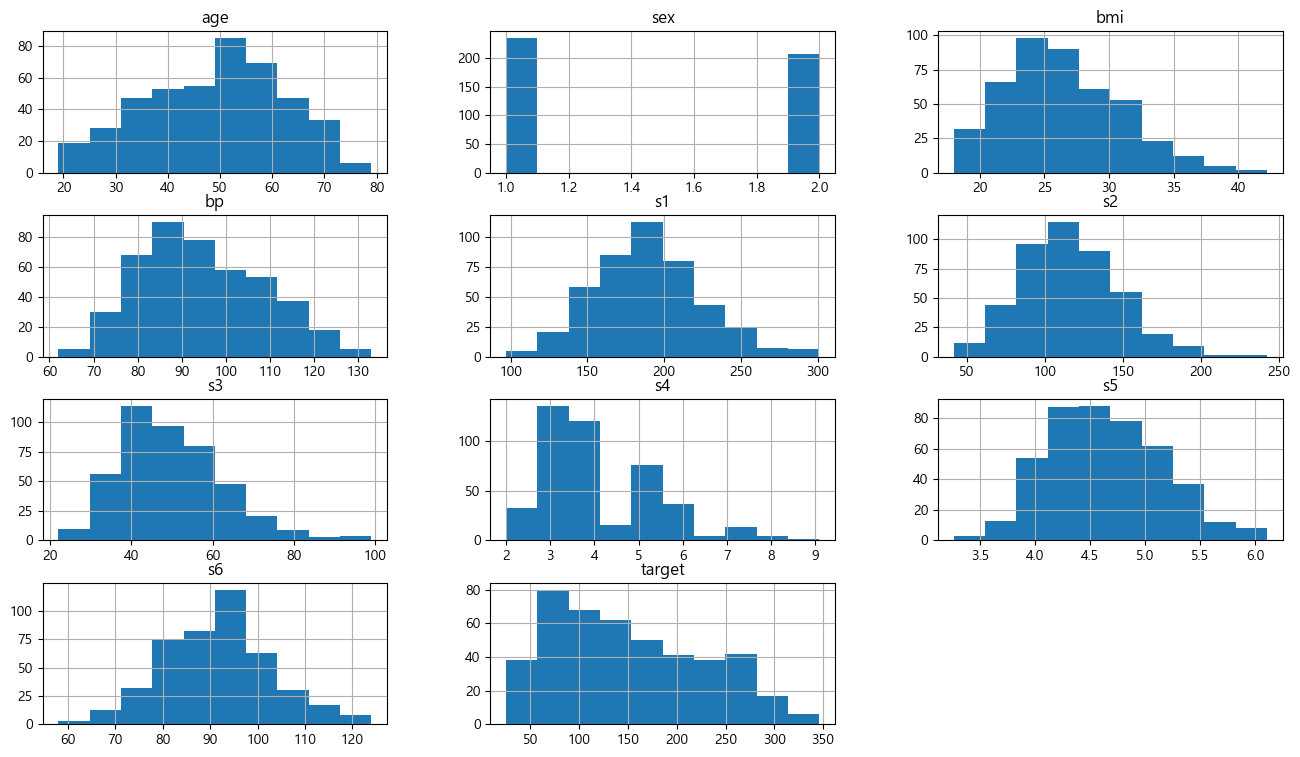

In [21]:
df.hist(figsize=(16,9))
plt.show()

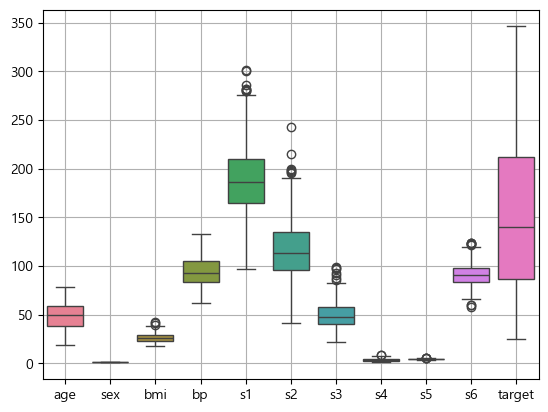

In [25]:
sns.boxplot(df)
plt.grid(True)

<Axes: >

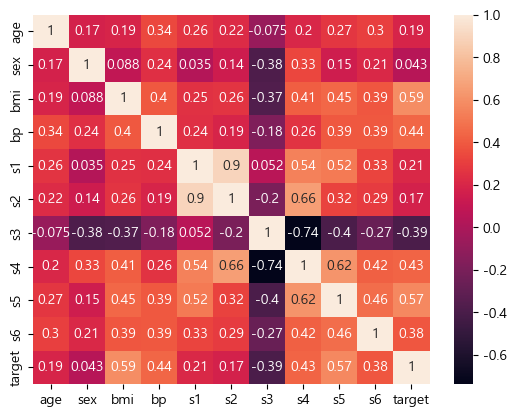

In [33]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [31]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


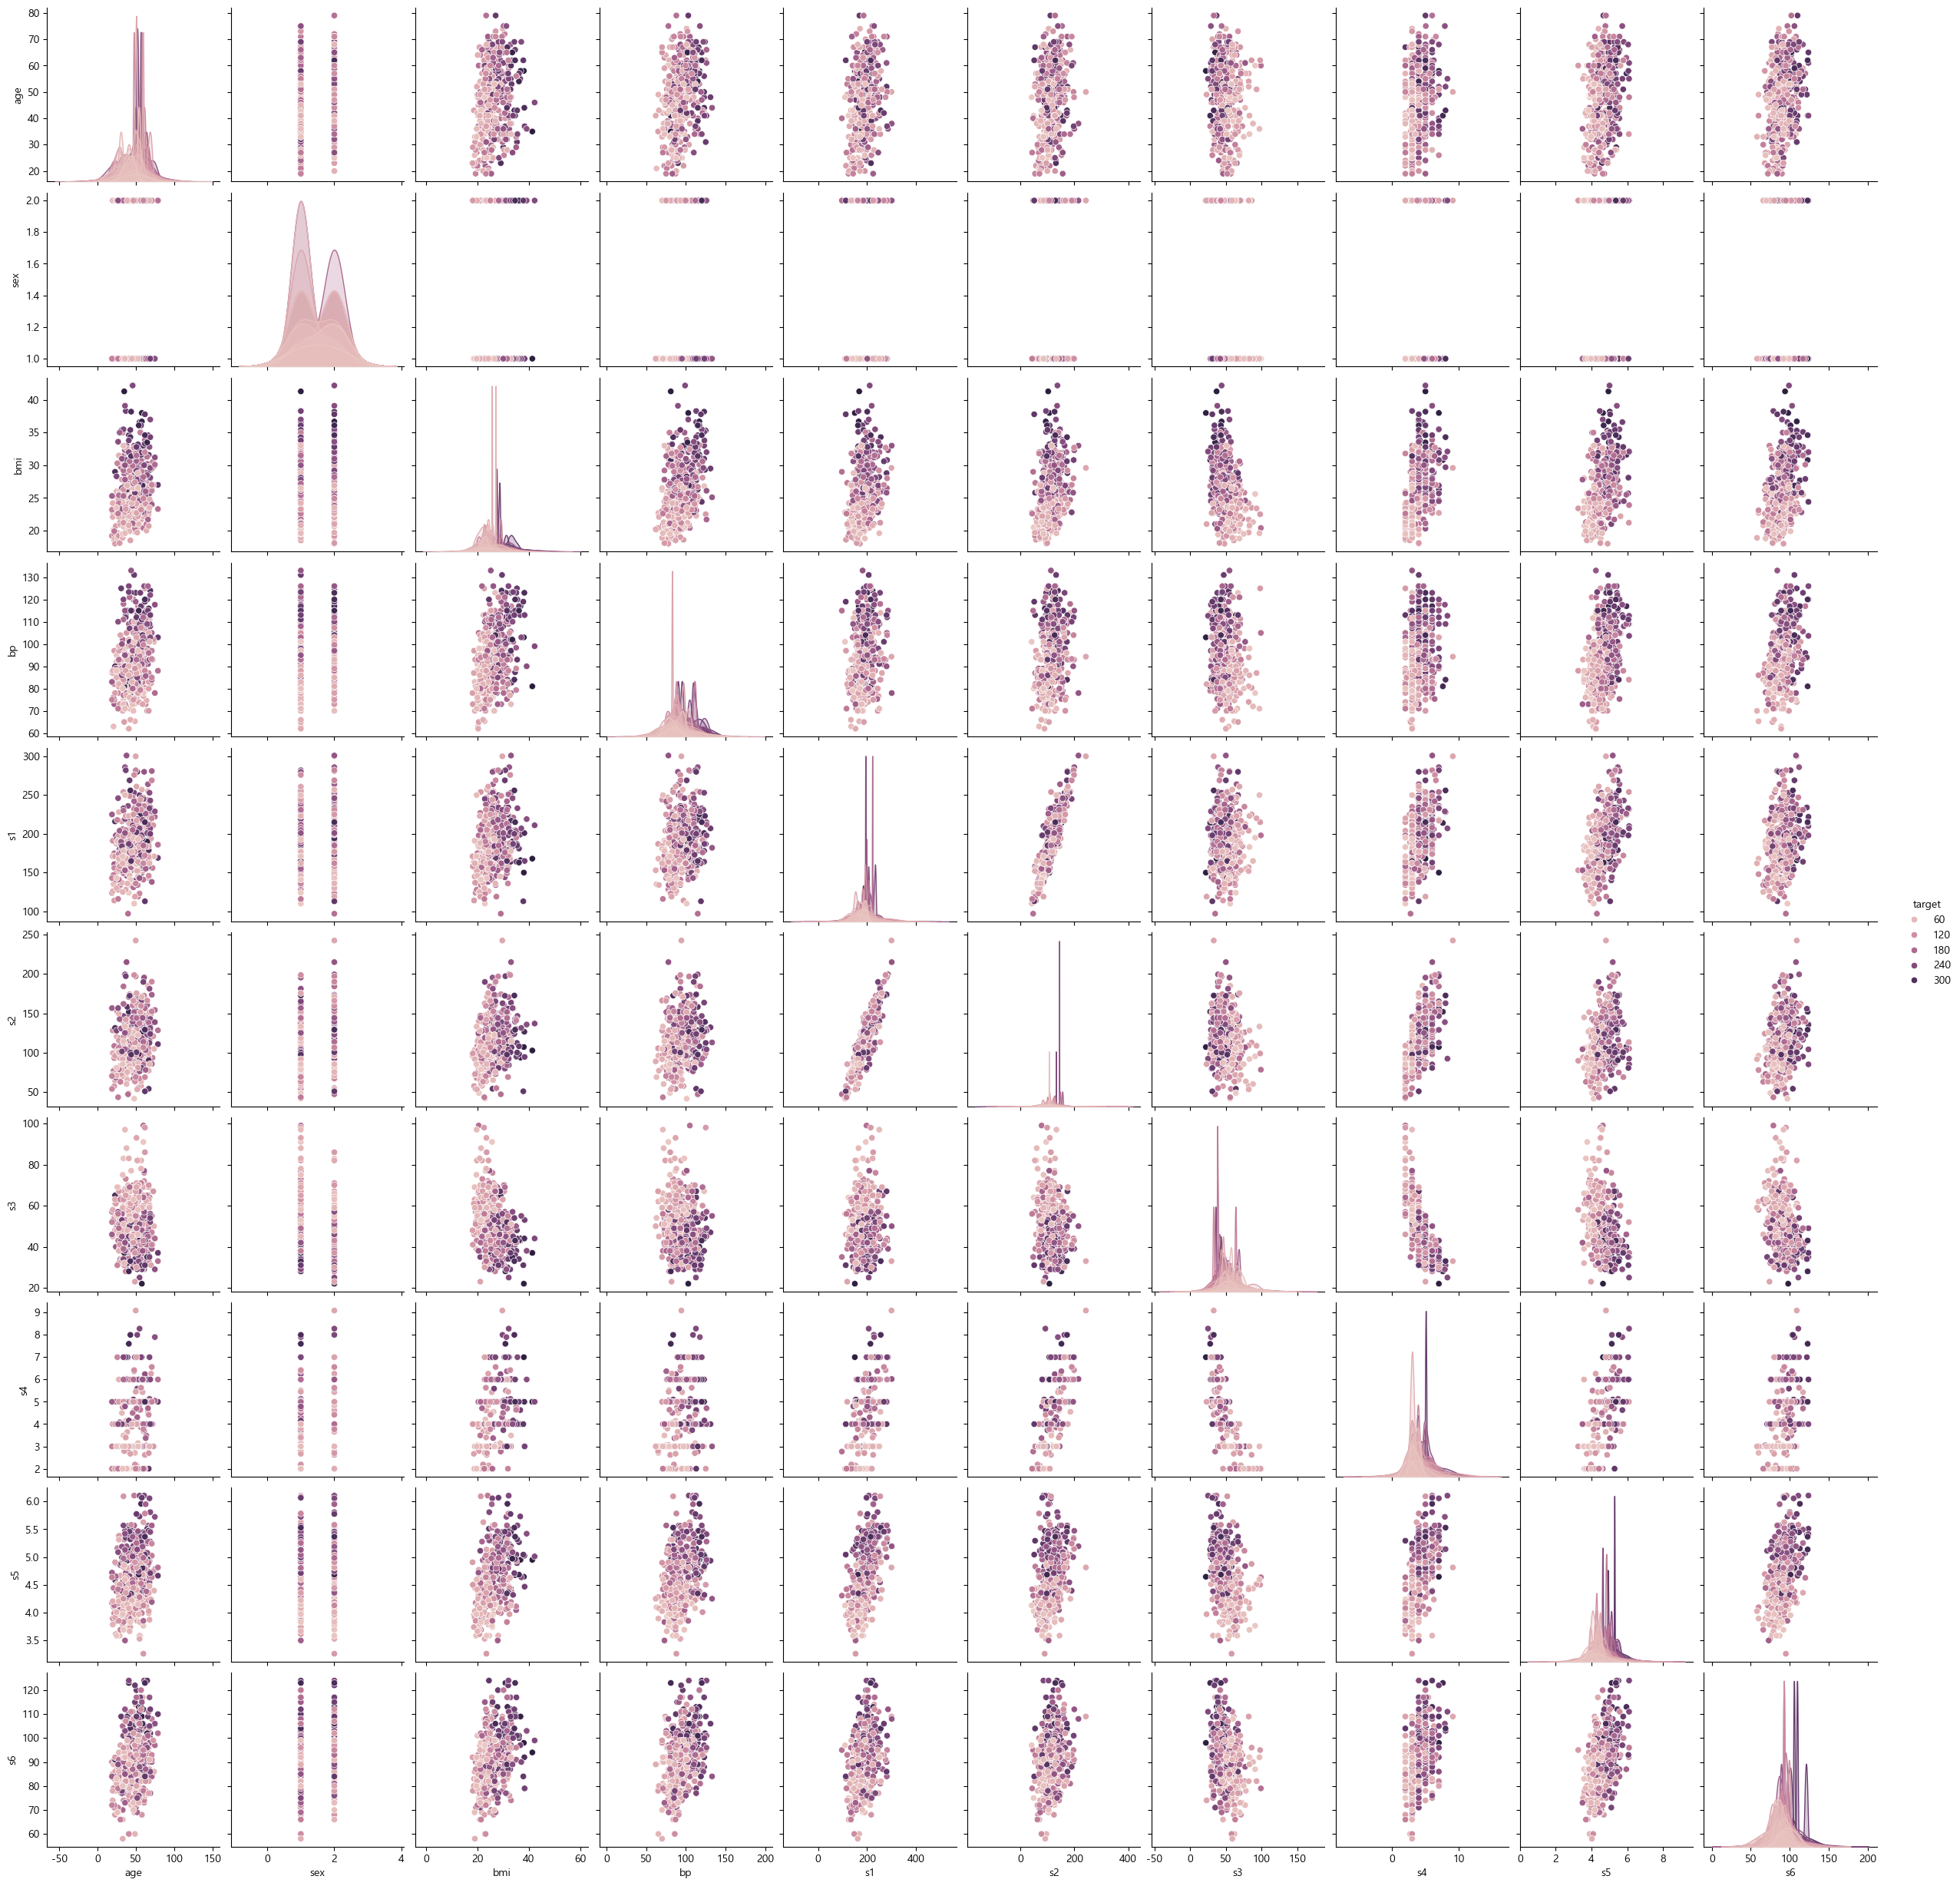

In [35]:
sns.pairplot(df, hue='target')

# 선형회귀 모델링

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# model_lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(f'훈련 데이터 성능 : {lr.score(X_train, y_train)}, 테스트 데이터 성능 {lr.score(X_test, y_test)}')

훈련 데이터 성능 : 0.5244124363545944, 테스트 데이터 성능 0.47728971643226115


In [57]:
print(f'훈련 데이터 성능 : {lr.score(X_train, y_train):.3f}, 테스트 데이터 성능 {lr.score(X_test, y_test):.3f}')

훈련 데이터 성능 : 0.524, 테스트 데이터 성능 0.477


In [59]:
from sklearn.tree import DecisionTreeRegressor  # vs Classifier
dt = DecisionTreeRegressor()
# model_lr = LinearRegression()

In [61]:
dt.fit(X_train, y_train)
print(f'훈련 데이터 성능 : {dt.score(X_train, y_train):.3f}, 테스트 데이터 성능 {dt.score(X_test, y_test):.3f}')

훈련 데이터 성능 : 1.000, 테스트 데이터 성능 0.022


In [ ]:
# 함수 하나 만들기

In [63]:
def 모델성능(model):
    model.fit(X_train, y_train)
    print(f'훈련 데이터 성능 : {model.score(X_train, y_train):.3f}, 테스트 데이터 성능 {model.score(X_test, y_test):.3f}')

In [65]:
모델성능(lr)

훈련 데이터 성능 : 0.524, 테스트 데이터 성능 0.477


# 선형회귀에서 비선형 관계를 포착하는 방법

In [197]:
# 2차항
X_train_x2 = np.hstack([X_train, X_train ** 2])
X_test_x2  = np.hstack([X_test ,  X_test ** 2])
# 3차항
X_train_x3 = np.hstack([X_train, X_train ** 2, X_train ** 3])
X_test_x3  = np.hstack([X_test ,  X_test ** 2,  X_test ** 3])
# 4차항
X_train_x4 = np.hstack([X_train, X_train ** 2, X_train ** 3, X_train ** 4])
X_test_x4  = np.hstack([X_test ,  X_test ** 2,  X_test ** 3,  X_test ** 4])

In [181]:
X_train_x2.shape, X_train.shape

((309, 20), (309, 10))

In [185]:
모델성능(lr)   # 1차항 데이터

훈련 데이터 성능 : 0.524, 테스트 데이터 성능 0.477


In [199]:
# 2차항
lr = LinearRegression()
lr.fit(X_train_x2, y_train)
print(f'훈련 데이터 성능 :  {lr.score(X_train_x2, y_train):.3f}')
print(f'테스트 데이터 성능: {lr.score(X_test_x2 ,  y_test):.3f}')

훈련 데이터 성능 :  0.553
테스트 데이터 성능: 0.487


In [201]:
# 3차항
lr = LinearRegression()
lr.fit(X_train_x3, y_train)
print(f'훈련 데이터 성능 :  {lr.score(X_train_x3, y_train):.3f}')
print(f'테스트 데이터 성능: {lr.score(X_test_x3 ,  y_test):.3f}')

훈련 데이터 성능 :  0.565
테스트 데이터 성능: 0.495


In [203]:
# 4차항
lr = LinearRegression()
lr.fit(X_train_x4, y_train)
print(f'훈련 데이터 성능 :  {lr.score(X_train_x4, y_train):.3f}')
print(f'테스트 데이터 성능: {lr.score(X_test_x4 ,  y_test):.3f}')

훈련 데이터 성능 :  0.573
테스트 데이터 성능: 0.452


# 규제
1. 라쏘 회귀
2. 릿지 회귀
3. 엘라스틱 넷

In [ ]:
10 -> 20 -> 30  0.565     25 컬럼만 가지고 예측   ( 훈련 -> 0.555 ,   )

In [ ]:
당뇨 진행정도 예측하는데는,..... 

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

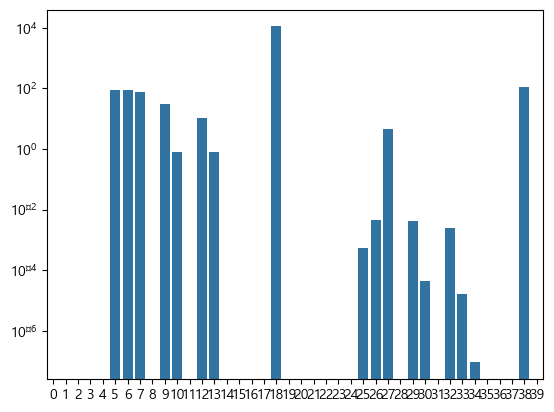

In [217]:
sns.barplot(lr.coef_)
plt.yscale('log')

## 스탠다드 스케일링과 민맥스 스케일링의 차이

# 스케일링 방법에 따른 모형 성능 차이

# 트리모형

In [111]:
dt = DecisionTreeRegressor(random_state=42)
모델성능(dt)

훈련 데이터 성능 : 1.000, 테스트 데이터 성능 -0.053


In [147]:
dt2 = DecisionTreeRegressor(random_state=42,
                            max_depth=2,
                            min_samples_split=2)
dt2

DecisionTreeRegressor(max_depth=2, random_state=42)

In [153]:
모델성능(lr)

훈련 데이터 성능 : 0.524, 테스트 데이터 성능 0.477


In [151]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
모델성능(rf)

훈련 데이터 성능 : 0.919, 테스트 데이터 성능 0.446
